In [378]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

from tqdm import tqdm


In [2]:
def gillespie_sir_simulations(beta, gamma, N, I0, R0, R1, num_simulations):
    
    infection_counts = []
    for _ in range(0,num_simulations):
        t = 0
        S=N-I0-R0 
        I=I0
        R=R0

        while I > 0:
            beta_t = beta * S * I / N
            gamma_t = gamma * I

            total_rate = beta_t + gamma_t

            dt = -math.log(np.random.uniform(low=0,high=1)) / total_rate
            t =t+dt

            if np.random.uniform(low=0,high=1) < S/(S+N/R1):
                S = S-1
                I = I+1
            else:
                I = I-1
                R = R+1

        infection_counts.append(R)

    return np.array(infection_counts)

# set the parameters
R1= [1.5 , 2 , 3]
gamma = 0.2 # recovered rate
beta = 0.3  # infected rate
  
N = 1000  
I0 = 1 
R0 = 0  
#t_max = 50 
num_simulations = 100000  

# run
infection_counts_a = gillespie_sir_simulations(gamma*R1[0], gamma, N, I0, R0, R1[0], num_simulations)
infection_counts_b = gillespie_sir_simulations(gamma*R1[1], gamma, N, I0, R0, R1[1], num_simulations)
infection_counts_c = gillespie_sir_simulations(gamma*R1[2], gamma, N, I0, R0, R1[2], num_simulations)



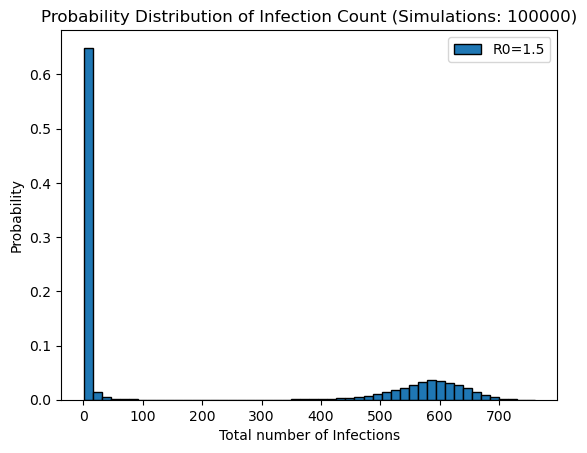

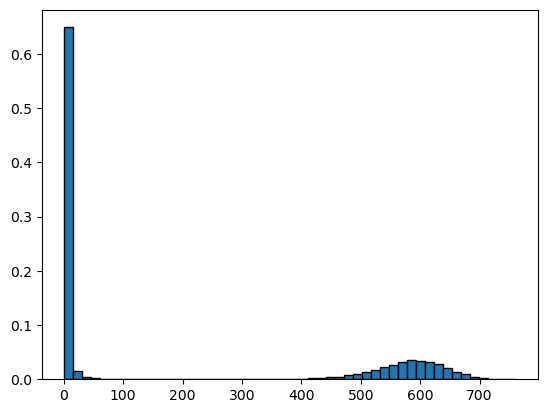

In [77]:
# plot the gragh 
#plt.subplot(3,1,1)
plt.hist(infection_counts_a,bins=50,edgecolor='k' ,density=False, weights=np.ones_like(infection_counts_a) / len(infection_counts_a),label='R0=1.5')
plt.xlabel('Total number of Infections')
plt.ylabel('Probability')
plt.title(f'Probability Distribution of Infection Count (Simulations: {num_simulations})')
plt.legend()
plt.show()

#hist_values_a,bins_edge,_ =plt.hist(infection_counts_a,bins=50,edgecolor='k' ,density=False, weights=np.ones_like(infection_counts_a) / len(infection_counts_a),label='R0=1.5')

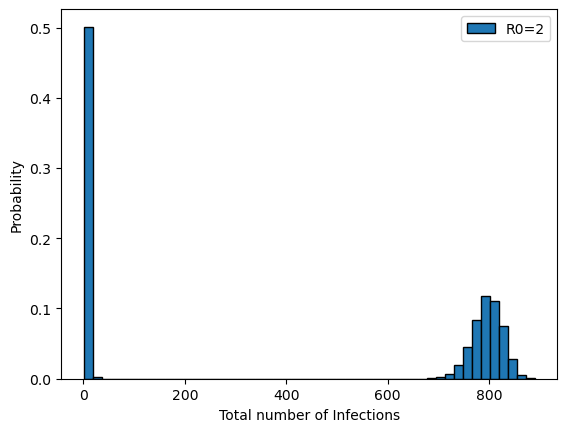

In [4]:

#1B
#plt.subplot(3,1,2)
plt.hist(infection_counts_b,bins=50,edgecolor='k' ,density=False, weights=np.ones_like(infection_counts_b) / len(infection_counts_b),label='R0=2')
plt.xlabel('Total number of Infections')
plt.ylabel('Probability')
#plt.title(f'Probability Distribution of Infection Count (Simulations: {num_simulations})')
plt.legend()
plt.show()


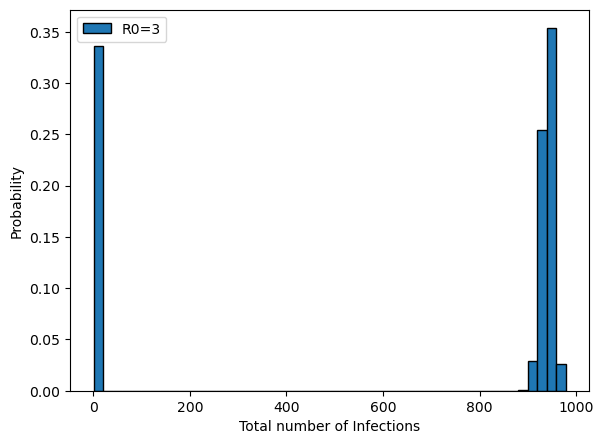

In [5]:

#1C
#plt.subplot(3,1,3)
plt.hist(infection_counts_c,bins=50,edgecolor='k' ,density=False, weights=np.ones_like(infection_counts_c) / len(infection_counts_c),label='R0=3')
plt.xlabel('Total number of Infections')
plt.ylabel('Probability')
#plt.title(f'Probability Distribution of Infection Count (Simulations: {num_simulations})')
plt.legend()
plt.tight_layout(pad=2)
plt.show()

Draw the infected number vs time by the Gillespie algorithm

In [12]:
def gillespie_sir(beta, gamma, N, I0, R0):
    t = 0
    S = N - I0 - R0
    I = I0
    R = R0
    R1= beta/gamma
    t_values = [t]
    S_values = [S]
    I_values = [I]
    R_values = [R]
    while  I > 0:
        beta_t = beta * S * I / N
        gamma_t = gamma * I
        total_rate = beta_t + gamma_t

        dt = -math.log(np.random.uniform())/ total_rate
        t = t+dt

        #
        if np.random.uniform() <  S/(S+N/R1):
            S =S - 1
            I =I + 1
        else:
            I =I - 1
            R =R + 1

        t_values.append(t)
        S_values.append(S)
        I_values.append(I)
        R_values.append(R)
        
        #if math.floor(t)>math.floor(t_values[-1]):
         #   t_days.append(math.floor(t))
          #  I_days.append(I)
            
    return np.array(t_values), np.array(S_values), np.array(I_values), np.array(R_values)
    


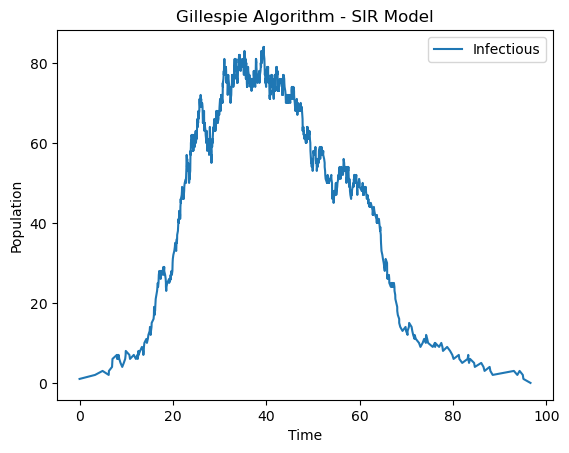

In [15]:
# setting the parameter
beta = 0.3  # infected rate
gamma = 0.2 # recovery rate
N = 1000  # total population
I0 = 1  # initial infected people
R0 = 0  # initial recovery people


# run the Gillespie 
t_values, S_values, I_values, R_values = gillespie_sir(beta, gamma, N, I0, R0)
#print(t_values)

#plot the result
#plt.plot(t_values, S_values, label='Susceptible')
plt.plot(t_values, I_values, label='Infectious')
#plt.plot(t_values, R_values, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Gillespie Algorithm - SIR Model')
plt.legend()
plt.show()


Then we want to draw the picture of the number of Infected people vs days

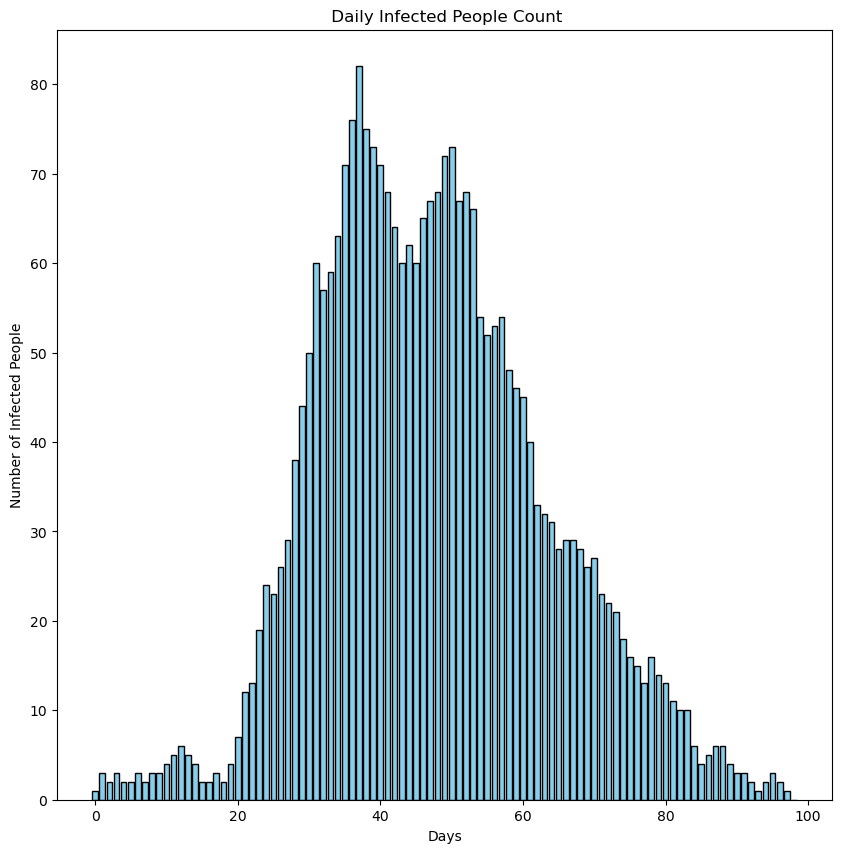

In [48]:
t_days=[0]
I_days=[1]
k=1
for i in range(len(t_values)):
    if math.floor(t_values[i])>k:
        t_days.append(k)
        I_days.append(I_values[i])
        i=i+1
        k = k+1
    else:
        pass

plt.figure(figsize=(10,10))
plt.bar(t_days,I_days,color='skyblue',edgecolor='k')
plt.xlabel('Days')
plt.ylabel('Number of Infected People')
plt.title(' Daily Infected People Count')
plt.show()
#plt.hist(infection_counts_c,bins=50,edgecolor='k' ,density=False, weights=np.ones_like(infection_counts_c) / len(infection_counts_c),label='R0=3')

By using the floor function to determine the days and infected number. We record the number of infected number vs days correspond to the infected number that first time that t>1,t>2,... Then draw this gragh which shows the daily infected people count. 

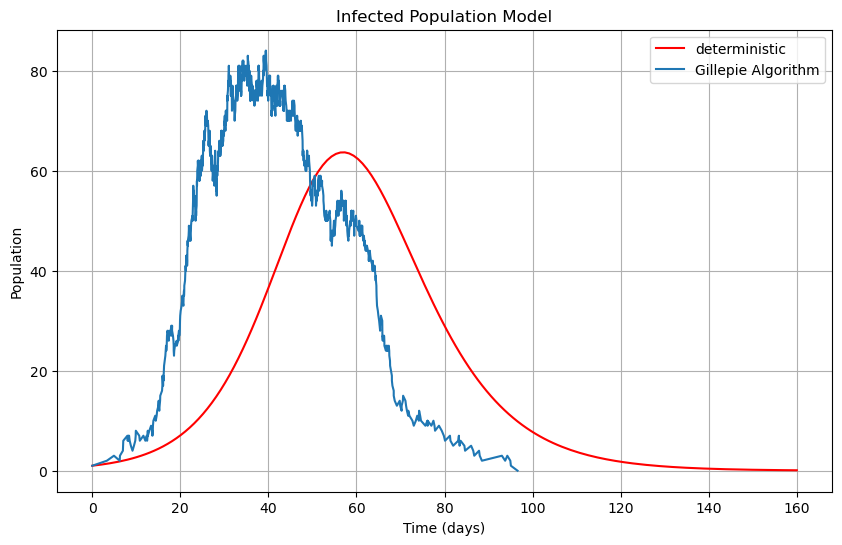

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the SIR model's differential equations
def SIR_model(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Define model parameters
beta = 0.3  # Infection rate
gamma = 0.2  # Recovery rate
N = 1000  # Total population
I0 = 1  # Initial number of infected individuals
R0 = 0  # Initial number of recovered individuals
S0 = N - I0 - R0  # Initial number of susceptible individuals
y0 = [S0, I0, R0]  # Initial state vector
t = np.linspace(0, 160, 160)  # Time range

# Solve the differential equations
solution = odeint(SIR_model, y0, t, args=(beta, gamma, N))
S, I, R = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
#plt.plot(t, S, label='Susceptible', color='b')
plt.plot(t, I, label='deterministic', color='r')
#plt.plot(t, R, label='Recovered', color='g')
plt.plot(t_values, I_values, label='Gillepie Algorithm')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Infected Population Model')
plt.legend()
plt.grid(True)


#plt.plot(t_values, S_values, label='Susceptible')

#plt.plot(t_values, R_values, label='Recovered')
#plt.xlabel('Time')
#plt.ylabel('Population')
#plt.title('Gillespie Algorithm - SIR Model')
#plt.legend()
plt.show()


### WEEK 5


#### Analytic solution

In [304]:
import numpy as np
import scipy.integrate as spi

def CER(t0, mu, sigma):
    f1 = lambda x: sigma*(10 + 5 * np.cos(np.pi * x / 6) - mu)
    f2 = lambda x: sigma*(mu * np.exp(- spi.quad(f1, t0, x)[0]))
    y = 1 / (1 + spi.quad(f2, t0, np.inf)[0])
    return y


/var/folders/j7/02jqfdhj5vbd4_r56lr4_ycc0000gn/T/ipykernel_23147/1590885405.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f2 = lambda x: sigma*(mu * np.exp(- spi.quad(f1, t0, x)[0]))


[0.6730376193530817, 0.6728591478919923, 0.6726107278443524, 0.672292055994843, 0.6719027809373028, 0.6714425022432411, 0.6709107695698198, 0.670307081703033, 0.669630885531491, 0.6688815749458281, 0.6680584896583038, 0.6671609139366179, 0.6661880752453103, 0.6651391427873424, 0.6640132259375169, 0.6628093725582638, 0.6615265671869446, 0.6601637290821373, 0.6587197101142973, 0.657193292701047, 0.6555831865705449, 0.6538880271408396, 0.6521063718657276, 0.6502366972325783, 0.6482773951973514, 0.6462267692591165, 0.6440830300864373, 0.6418442906109716, 0.6395085604820803, 0.6370737397489707, 0.6345376116025924, 0.6318978339666672, 0.6291519296742542, 0.626297274901481, 0.6233310854519492, 0.6202504003926828, 0.6170520624348199, 0.6137326943302495, 0.610288670421544, 0.6067160823419717, 0.603010697723886, 0.5991679106507577, 0.5951826825010242, 0.5910494718055174, 0.586762151815835, 0.582313914696632, 0.5776971616742901, 0.5729033791584307, 0.5679230018769796, 0.5627452655065261, 0.557358

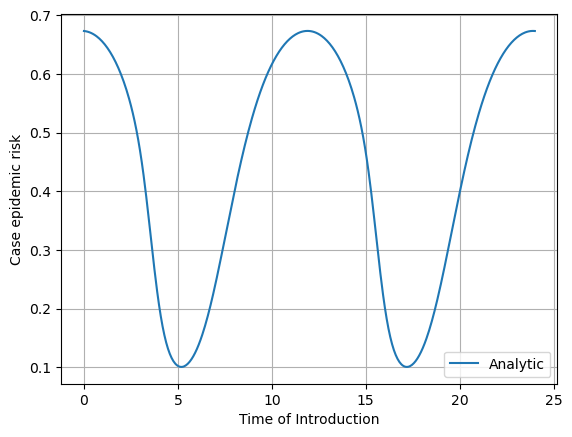

In [305]:
CERR=[]
x=np.linspace(0,24,500)
for i in range(0,len(x)):
    a = CER(x[i],4.9,1)
    CERR.append(a)

print(CERR)
plt.plot(x,CERR,label='Analytic')
plt.xlabel('Time of Introduction')
plt.ylabel('Case epidemic risk')
#plt.title('Conditional Expected Return')  # 图形标题
plt.legend()  
plt.grid(True)  
plt.show()


In [306]:
import numpy as np
from scipy.optimize import minimize_scalar



# 定义目标函数
def objective_function(x):
    return -CER(x, 4.9,1)  # 要找最大值，所以要返回负的函数值
def objective_function1(x):
    return CER(x, 4.9,1)
# 初始猜测值
initial_guess = 0  

# 使用 minimize_scalar 函数找到最大值
result = minimize_scalar(objective_function, bounds=(0, 24), method='bounded')
result1 = minimize_scalar(objective_function1,bounds=(0,24), method = 'bounded')
# 最大值所对应的自变量
max_t0 = result.x  
min_t0 = result1.x
# 最大值
max_CER = -result.fun  
min_CER = result1.fun
print("最大值所对应的自变量:", max_t0)
print("最大值:", max_CER)
print(min_t0)


最大值所对应的自变量: 11.900607775338479
最大值: 0.6731858464109823
17.186060031597297


/var/folders/j7/02jqfdhj5vbd4_r56lr4_ycc0000gn/T/ipykernel_23147/1590885405.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f2 = lambda x: sigma*(mu * np.exp(- spi.quad(f1, t0, x)[0]))


## IER

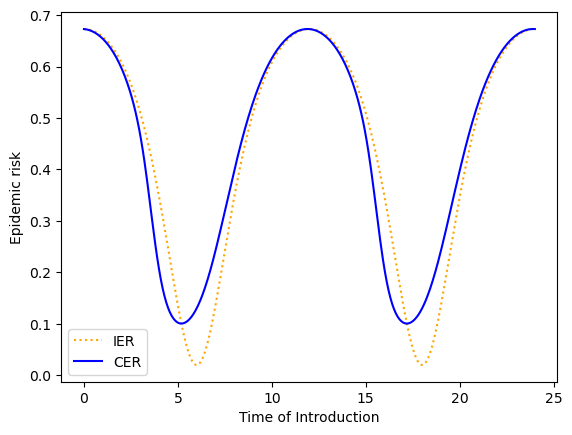

In [307]:
def IER(mu,beta_1,beta_0,phi,x):
    y =lambda x:  beta_0+beta_1 * np.cos(np.pi*x/6-phi)
    a = 1-mu/y(x)
    return a

x=np.linspace(0,24,500)
IERR = []
for i in range(0,len(x)):
    a = IER(mu=4.9, beta_1 = 5,beta_0=10,phi = 0,x=x[i])
    IERR.append(a)

plt.plot(x,IERR,label='IER',linestyle=':',color='orange')
plt.plot(x,CERR,label='CER',color='blue')
plt.xlabel('Time of Introduction')
plt.ylabel('Epidemic risk')
plt.legend()
plt.show()


In [308]:
import numpy as np
from random import *
import math as math
import matplotlib.pyplot as plt
import scipy.integrate as spi
from scipy.optimize import fsolve

In [363]:
N = 1000

initial_infected = 1
simulations = 100000

# Initial conditions
S = N - initial_infected
I = initial_infected
R = 0

# Gillespie algorithm

class gill_alg():
    def __init__(self,beta_0,beta_1,phi,N,mu,t_0):
        self.beta_0 = beta_0
        self.beta_1 = beta_1
        self.phi = phi
        self.N = N
        self.mu = mu
        self.t_0 = t_0
        
    def beta_t(self,t):
        B_t = self.beta_0 + 5*np.cos((np.pi/6)*t)
        return B_t
        
    def delta_t(self,S_t,I_t,t):
        r_1 = np.random.random()
        f = lambda s: (self.beta_t(s)*S_t*I_t) / N + self.mu * I_t
        y = lambda x: spi.quad(f,t,t+x)[0]+ np.log(r_1)
        root = fsolve(y,x0 = 1) 
        return root[0]
    ### should be t+tau
    
gillespie = gill_alg(beta_0=10, beta_1=5, phi=0, N=1000, mu=4.9,t_0=0)




In [393]:
def gillespie_SIR(S, I, R, t0, gamma):
    time_points = [t0]
    susceptible = [S]
    infected = [I]
    recovered = [R]
    t = t0
    while I > 0:
        # Calculate rates
        
        rate_infection = gillespie.beta_t(t) * I * S / N
        rate_recovery = gamma * I
        total_rate = rate_infection + rate_recovery
        #print(t)

        # Calculate time until the next event
        dt = gillespie.delta_t(S,I,t)
        t = t + dt
        #print(dt)

        # Determine the event (infection or recovery)
        prob_infection = rate_infection / total_rate
        event = np.random.random()

        # Update populations
        if event < prob_infection:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1

        # Update time and populations
        time_points.append(time_points[-1] + dt)
        susceptible.append(S)
        infected.append(I)
        recovered.append(R)
        
        #print(time_points)

    return time_points, susceptible, infected, recovered

/Users/caihongye/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


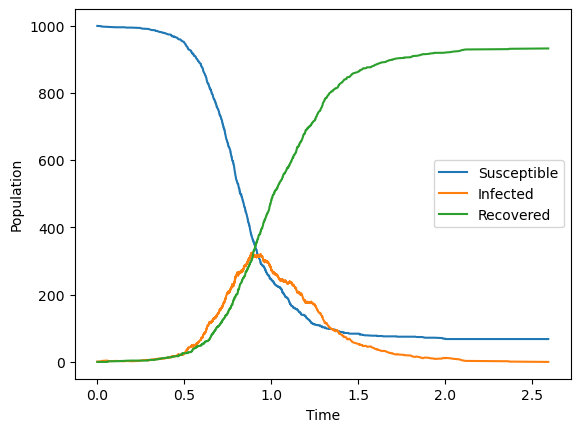

In [394]:
time_points, susceptible, infected, recovered = gillespie_SIR(S, I, R,0, 4.9)

# Plot the results
plt.plot(time_points, susceptible, label='Susceptible')
plt.plot(time_points, infected, label='Infected')
plt.plot(time_points, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

## Simulation

In [396]:
def gillespie_sir_beta_t_simulations (gamma,t0, N, I0, R0, num_simulations):
    
    recovered_counts = []
    for _ in range(0,num_simulations):
        t = t0
        S=N-I0-R0 
        I=I0
        R=R0
        
        while I > 0:
        # Calculate rates
            
            rate_infection = gillespie.beta_t(t) * I * S / N
            rate_recovery = gamma * I
            total_rate = rate_infection + rate_recovery
        #print(t)

        # Calculate time until the next event
            dt = gillespie.delta_t(S,I,t)
            t = t + dt
        #print(dt)

        # Determine the event (infection or recovery)
            prob_infection = rate_infection / total_rate
            event = np.random.random()

            if event < prob_infection:
                S = S - 1
                I = I + 1
            else:
                I = I - 1
                R = R + 1

        
        recovered_counts.append(R)
        

    return np.array(recovered_counts)


  

In [381]:

# run
recovered_counts_anew= gillespie_sir_beta_t_simulations(gamma=4.9,t0=0, N=1000, I0=1, R0=0, num_simulations=1000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


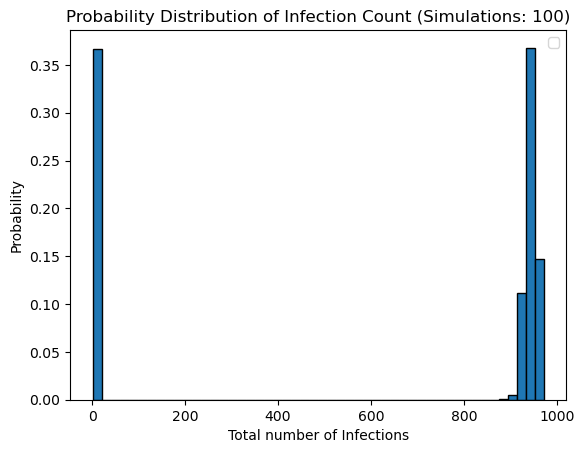

In [382]:
plt.hist(recovered_counts_anew,bins=50,edgecolor='k' ,density=False, weights=np.ones_like(recovered_counts_anew) / len(recovered_counts_anew))
plt.xlabel('Total number of Infections')
plt.ylabel('Probability')
plt.title(f'Probability Distribution of Infection Count (Simulations: {100})')
plt.legend()
plt.show()

The Major Outbreak

In [413]:
# Use a for loop to iterate through the list and find values greater than 5
def counts(set):
    counts = 0
    for i in range(0,len(set)):
        if set[i] > 100:
            counts += 1

    #print('The major outbreak is',counts/100)
    return counts/2000

In [384]:
Outbreak = counts(recovered_counts_anew)
Outbreak

0.633

Simulation for 24 month

## simulation group

In [412]:
recovered_counts = []

for t in tqdm(range(24)):
    aaa = gillespie_sir_beta_t_simulations(gamma = 4.9,t0=t, N=1000, I0=1, R0=0, num_simulations=2000)
    recovered_counts.append(aaa)
    


100%|██████████| 24/24 [10:13:06<00:00, 1532.76s/it]  


In [414]:
Simulation=[]
for i in range(len(recovered_counts)):
    a = recovered_counts[i]
    Simulation.append(counts(a))

print(Simulation)



[0.6835, 0.6515, 0.5935, 0.4615, 0.203, 0.089, 0.134, 0.2285, 0.3975, 0.516, 0.6115, 0.6445, 0.6835, 0.6585, 0.6035, 0.487, 0.2115, 0.089, 0.1195, 0.2295, 0.3765, 0.5075, 0.6095, 0.661]


/var/folders/j7/02jqfdhj5vbd4_r56lr4_ycc0000gn/T/ipykernel_23147/1590885405.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f2 = lambda x: sigma*(mu * np.exp(- spi.quad(f1, t0, x)[0]))


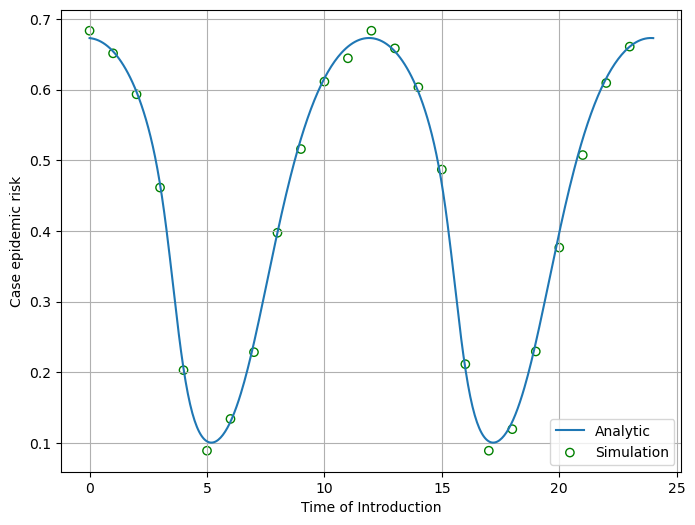

In [420]:
CERR=[]
x=np.linspace(0,24,500)
for i in range(0,len(x)):
    a = CER(x[i],4.9,1)
    CERR.append(a)
plt.figure(figsize=(8, 6))
plt.plot(x,CERR,label='Analytic')
#plt.plot(x,IERR, color = 'y')
plt.scatter(range(0,24),Simulation,label='Simulation' , marker='o',edgecolors='green', facecolors='none')
plt.xlabel('Time of Introduction')
plt.ylabel('Case epidemic risk')
#plt.title('Conditional Expected Return')  # 图形标题
plt.legend(loc='lower right')  
plt.grid(True)  
plt.show()
    

## figure1 C

/Users/caihongye/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


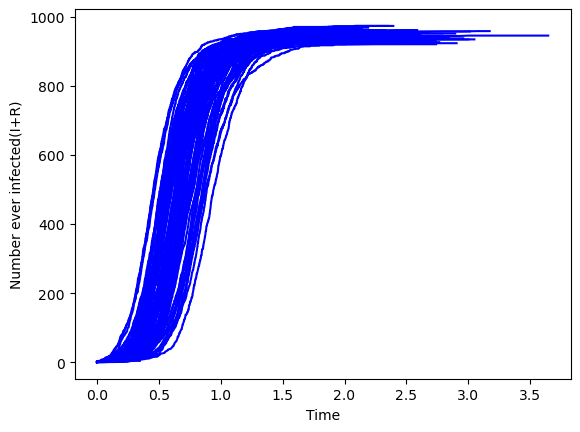

In [335]:
for _ in range(100):
    infect_plus_recover = []
    
    time_points, susceptible, infected, recovered = gillespie_SIR(S, I, R,t0=max_t0, gamma=4.9)
    aaaaa=np.array(infected)+np.array(recovered)
    time_points = np.array(time_points)
    infect_plus_recover.append(aaaaa)
# Plot the results
    plt.plot(time_points-max_t0, aaaaa,color='blue')
#plt.plot(time_points, infected, label='Infected')
#plt.plot(time_points, recovered, label='Recovered')
    plt.xlabel('Time')
    plt.ylabel('Number ever infected(I+R)')

plt.show()


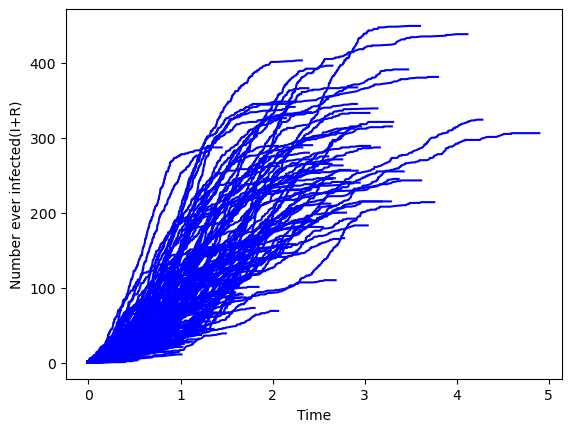

In [336]:
for _ in range(1000):
    infect_plus_recover = []
    
    time_points, susceptible, infected, recovered = gillespie_SIR(S, I, R,t0=min_t0, gamma=4.9)
    aaaaa=np.array(infected)+np.array(recovered)
    time_points = np.array(time_points)
    infect_plus_recover.append(aaaaa)
# Plot the results
    plt.plot(time_points-min_t0, aaaaa,color='blue')
#plt.plot(time_points, infected, label='Infected')
#plt.plot(time_points, recovered, label='Recovered')
    plt.xlabel('Time')
    plt.ylabel('Number ever infected(I+R)')

plt.show()


## figure 2

  0%|          | 0/5 [00:00<?, ?it/s]

/var/folders/j7/02jqfdhj5vbd4_r56lr4_ycc0000gn/T/ipykernel_23147/1590885405.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f2 = lambda x: sigma*(mu * np.exp(- spi.quad(f1, t0, x)[0]))
/var/folders/j7/02jqfdhj5vbd4_r56lr4_ycc0000gn/T/ipykernel_23147/1590885405.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probab

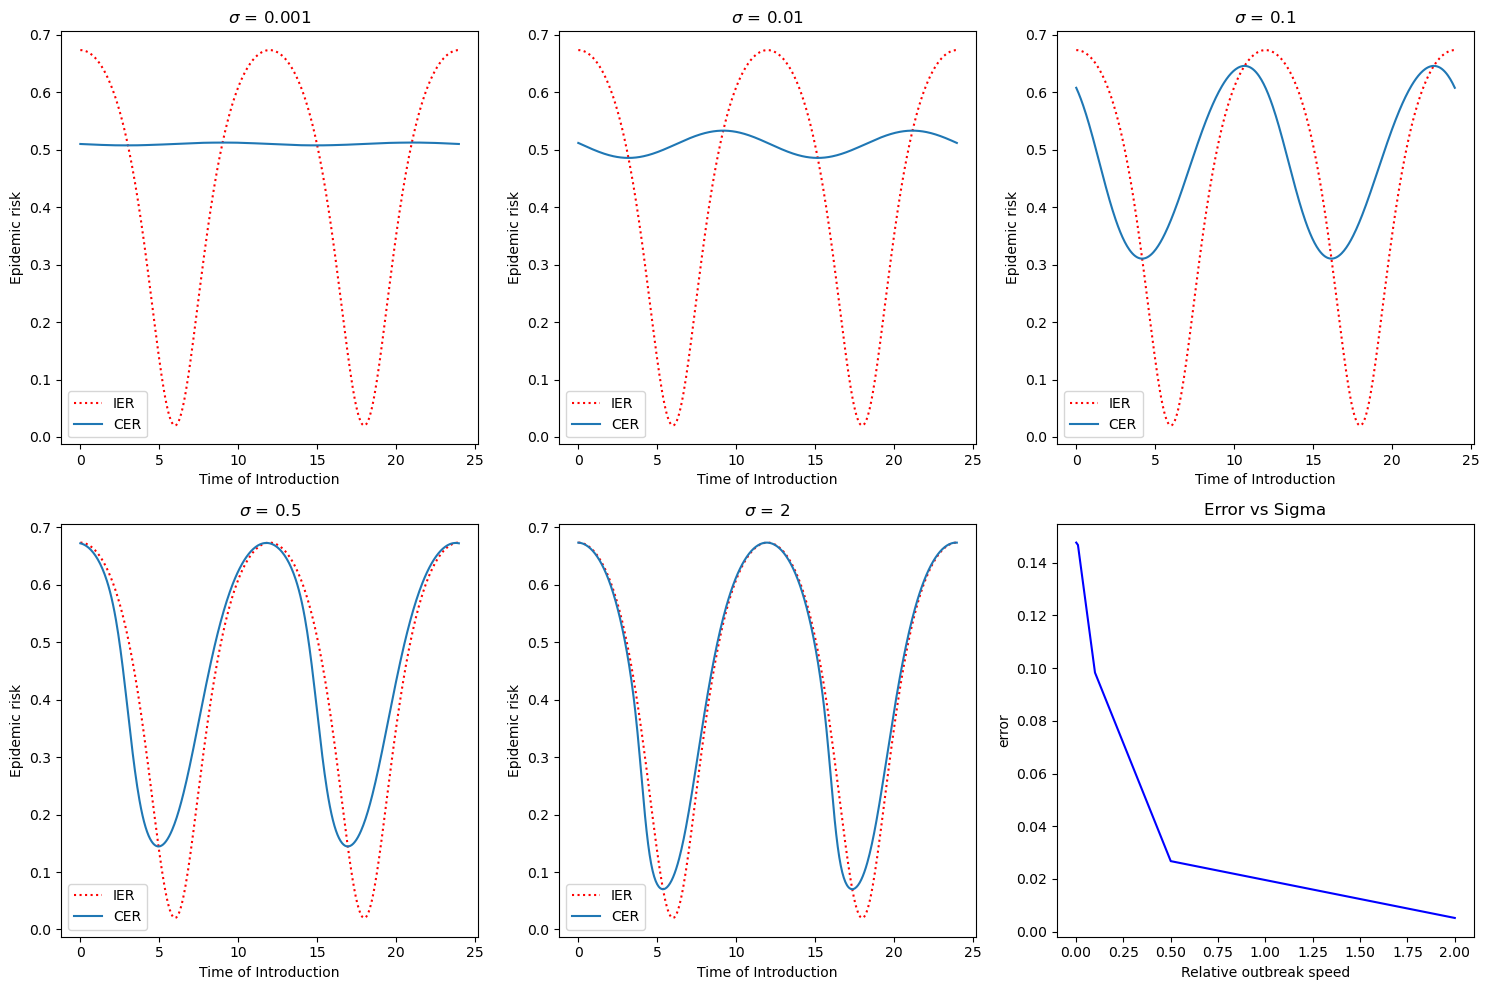

In [422]:
sigma_2 = [0.001, 0.01, 0.1, 0.5, 2]   
x = np.linspace(0, 24, 500) 
error = []

# Create a new figure with specified size
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for j in tqdm(range(len(sigma_2))) :
    CERR_A = []
    for i in tqdm(range(len(x))):
        a = CER(x[i], 4.9, sigma_2[j])
        CERR_A.append(a)
    b = (np.array(CERR_A) - np.array(IERR))[0:250]
    c = np.sum(b) / np.sum((np.array(CERR_A))[0:250])
    error.append(c)
        
    axs[j // 3, j % 3].plot(x, IERR, label='IER', linestyle=':', color='red')
    axs[j // 3, j % 3].plot(x, CERR_A, label='CER', )
    axs[j // 3, j % 3].set_xlabel('Time of Introduction')
    axs[j // 3, j % 3].set_ylabel('Epidemic risk') 
    axs[j // 3, j % 3].set_title(r'$\sigma$ = ' + str(sigma_2[j]))
    axs[j // 3, j % 3].legend()
    
# Plotting the error vs sigma_2
axs[1, 2].plot(sigma_2, error, color='b')
axs[1, 2].set_xlabel('Relative outbreak speed')
axs[1, 2].set_ylabel('error') 
axs[1, 2].set_title('Error vs Sigma')
fig.tight_layout()
plt.show()
